In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\ayush\AppData\Local\Temp\ipykernel_13156\4145819651.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [4]:
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

<Axes: >

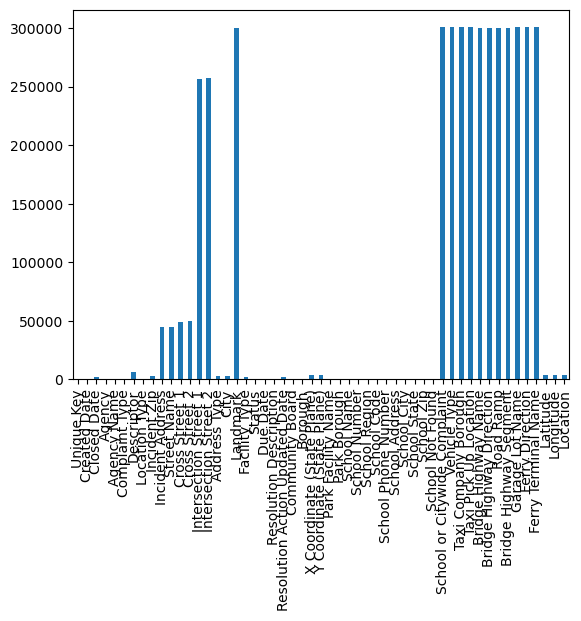

In [5]:
df.isna().sum().plot(kind = 'bar')

In [6]:
#as we can see almost all the  values of landmark columns and columns from "School or Citywide Complaint" to "Ferry Terminal Name" are null so we will go ahead and drop theese columns

df = df.drop(['Landmark','School or Citywide Complaint',
              'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
              'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
              'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction','Ferry Terminal Name'], axis  = 1)

<Axes: >

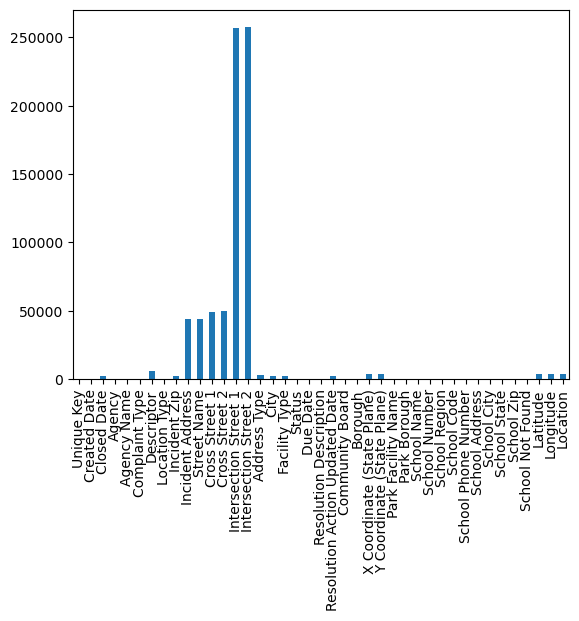

In [7]:
df.isna().sum().plot(kind = 'bar')

Now will check every feature and will extract usefull fatures in another dataframe.

In [8]:
df['Unique Key'].value_counts()

32310363    1
30964902    1
30963768    1
30961544    1
30964777    1
           ..
31611925    1
31615926    1
31612695    1
31617117    1
30281825    1
Name: Unique Key, Length: 300698, dtype: int64

In [9]:
df['Created Date'].value_counts()

07-11-15 23:04            9
11-06-15 23:34            9
06-06-15 22:23            9
10-09-15 23:56            8
11-01-15 22:12            8
                         ..
09/22/2015 05:52:17 PM    1
09/22/2015 05:50:43 PM    1
09/22/2015 05:49:55 PM    1
09/22/2015 05:49:47 PM    1
03/29/2015 12:33:01 AM    1
Name: Created Date, Length: 259493, dtype: int64

In [10]:
df['Closed Date'].value_counts()

11-08-15 7:34             24
10-11-15 7:03             22
12-08-15 7:44             18
05-10-15 7:01             18
12-07-15 23:17            17
                          ..
09/21/2015 11:03:55 AM     1
09/21/2015 08:52:27 AM     1
09/21/2015 09:13:15 AM     1
09/21/2015 08:26:57 AM     1
03/29/2015 04:41:50 AM     1
Name: Closed Date, Length: 237165, dtype: int64

In [11]:
df['Agency'].value_counts()

NYPD    300698
Name: Agency, dtype: int64

In [12]:
df['Agency Name'].value_counts()

New York City Police Department    300690
Internal Affairs Bureau                 6
NYPD                                    2
Name: Agency Name, dtype: int64

In [13]:
df['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [14]:
df['Descriptor'].value_counts()

Loud Music/Party                  61430
No Access                         56976
Posted Parking Sign Violation     22440
Loud Talking                      21584
Partial Access                    20068
With License Plate                17718
Blocked Hydrant                   16081
Commercial Overnight Parking      12189
Car/Truck Music                   11273
Blocked Sidewalk                  11121
Double Parked Blocking Traffic     5731
Double Parked Blocking Vehicle     4211
Engine Idling                      4189
Banging/Pounding                   4165
Neglected                          3787
Car/Truck Horn                     3511
Congestion/Gridlock                2761
In Prohibited Area                 2025
Other (complaint details)          1969
Unlicensed                         1777
Overnight Commercial Storage       1757
Unauthorized Bus Layover           1367
Truck Route Violation              1014
In Public                           932
Tortured                            854


In [15]:
df['Location Type'].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Terminal                           1
Ferry                              1
Park                               1
Name: Location Type, dtype: int64

In [16]:
df['Incident Zip'].value_counts()

11385.0    5167
11368.0    4298
11211.0    4225
11234.0    4150
11206.0    3781
           ... 
10153.0       1
11242.0       1
11371.0       1
11451.0       1
11241.0       1
Name: Incident Zip, Length: 201, dtype: int64

In [18]:
df['Incident Address'].value_counts()

1207 BEACH AVENUE          904
78-15 PARSONS BOULEVARD    505
89 MOORE STREET            480
177 LAREDO AVENUE          311
2117 3 AVENUE              295
                          ... 
131 NORTH    6 STREET        1
233W WEST 115 STREET         1
235 MONTROSE AVENUE          1
250 EAST 25 STREET           1
100-17 87 AVENUE             1
Name: Incident Address, Length: 107652, dtype: int64

In [19]:
df['Street Name'].value_counts()

BROADWAY            3237
3 AVENUE            1241
SHERMAN AVENUE      1156
BEACH AVENUE        1109
BEDFORD AVENUE       979
                    ... 
84TH DRIVE             1
BONNER PLACE           1
CEDARCROFT PLACE       1
GRAMERCY PARK          1
COOPER AVE             1
Name: Street Name, Length: 7320, dtype: int64

In [20]:
df['Cross Street 1'].value_counts()

BROADWAY            4338
BEND                4129
3 AVENUE            3112
5 AVENUE            3035
AMSTERDAM AVENUE    2651
                    ... 
BAY 11 STREET          1
HANK PLACE             1
PYRAMID COURT          1
BOWDOIN STREET         1
EAST 186               1
Name: Cross Street 1, Length: 5982, dtype: int64

In [21]:
df['Cross Street 2'].value_counts()

BEND                  4391
BROADWAY              3784
8 AVENUE              2766
DEAD END              2144
7 AVENUE              2140
                      ... 
CONNOR STREET            1
SANDY LANE               1
MC LAUGHLIN AVENUE       1
TIEMAN AVENUE            1
GRAMERCY PARK            1
Name: Cross Street 2, Length: 5823, dtype: int64

In [22]:
df['Address Type'].value_counts()

ADDRESS         238644
INTERSECTION     43366
BLOCKFACE        12014
LATLONG           3509
PLACENAME          350
Name: Address Type, dtype: int64

In [23]:
df['City'].value_counts().head()

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
Name: City, dtype: int64

In [24]:
df['Facility Type'].value_counts()

Precinct    298527
Name: Facility Type, dtype: int64

In [25]:
df['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

In [26]:
df['Due Date'].value_counts()

11-07-15 7:34             9
06-07-15 6:23             9
07-12-15 7:04             9
11-02-15 6:12             8
05-03-15 9:32             8
                         ..
09/22/2015 09:39:41 PM    1
09/22/2015 09:39:38 PM    1
09/22/2015 09:38:34 PM    1
09/22/2015 09:37:02 PM    1
03/29/2015 08:33:01 AM    1
Name: Due Date, Length: 259851, dtype: int64

In [27]:
df['Resolution Description'].value_counts().head()

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.    90490
The Police Department responded to the complaint and took action to fix the condition.                                                     61624
The Police Department responded and upon arrival those responsible for the condition were gone.                                            58031
The Police Department responded to the complaint and determined that police action was not necessary.                                      38211
The Police Department issued a summons in response to the complaint.                                                                       28246
Name: Resolution Description, dtype: int64

In [28]:
df['Resolution Action Updated Date'].value_counts()

11-08-15 7:34             24
10-11-15 7:03             22
05-10-15 7:01             18
12-08-15 7:44             18
12-07-15 23:17            17
                          ..
09/22/2015 12:43:13 AM     1
09/21/2015 08:30:02 PM     1
09/22/2015 07:32:20 AM     1
09/22/2015 01:47:57 AM     1
03/29/2015 04:41:50 AM     1
Name: Resolution Action Updated Date, Length: 237895, dtype: int64

In [29]:
df['Community Board'].value_counts()

12 MANHATTAN                 12390
01 BROOKLYN                  10920
05 QUEENS                     9422
01 QUEENS                     9197
09 QUEENS                     8013
                             ...  
84 QUEENS                       11
56 BROOKLYN                      9
80 QUEENS                        7
Unspecified STATEN ISLAND        2
Unspecified QUEENS               2
Name: Community Board, Length: 75, dtype: int64

In [30]:
df['Borough'].value_counts()

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Borough, dtype: int64

In [31]:
df['Park Facility Name'].value_counts()

Unspecified                        300697
Alley Pond Park - Nature Center         1
Name: Park Facility Name, dtype: int64

In [32]:
df['Park Borough'].value_counts()

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Park Borough, dtype: int64

In [33]:
df['School Name'].value_counts()

Unspecified                        300697
Alley Pond Park - Nature Center         1
Name: School Name, dtype: int64

In [34]:
df['School Region'].value_counts()

Unspecified    300697
Name: School Region, dtype: int64

In [36]:
df['School Code'].value_counts()

Unspecified    300697
Name: School Code, dtype: int64

In [37]:
df['School Phone Number'].value_counts()

Unspecified    300697
7182176034          1
Name: School Phone Number, dtype: int64

In [38]:
df['School Address'].value_counts()

Unspecified                                     300697
Grand Central Parkway, near the soccer field         1
Name: School Address, dtype: int64

In [39]:
df['School City'].value_counts()

Unspecified    300697
QUEENS              1
Name: School City, dtype: int64

In [40]:
df['School State'].value_counts()

Unspecified    300697
NY                  1
Name: School State, dtype: int64

In [41]:
df['School Zip'].value_counts()

Unspecified    300697
Name: School Zip, dtype: int64

In [42]:
df['School Not Found'].value_counts()

N    300698
Name: School Not Found, dtype: int64

In [43]:
df['School Not Found'].value_counts()

N    300698
Name: School Not Found, dtype: int64

In [44]:
df['Latitude'].value_counts()

40.830362    902
40.721959    505
40.703819    480
40.647132    362
40.708726    341
            ... 
40.847772      1
40.754813      1
40.726701      1
40.774942      1
40.716053      1
Name: Latitude, Length: 125122, dtype: int64

In [45]:
df['Longitude'].value_counts()

-73.866022    902
-73.809697    505
-73.942073    480
-73.790654    341
-74.004623    340
             ... 
-73.993975      1
-73.940633      1
-73.940517      1
-73.957122      1
-73.991378      1
Name: Longitude, Length: 125216, dtype: int64

In [46]:
df['Location'].value_counts()

(40.83036235589997, -73.86602154214397)     902
(40.72195913199264, -73.80969682426189)     505
(40.703818970933284, -73.94207345177706)    476
(40.708726489323325, -73.7906539235748)     341
(40.64713190020787, -74.00462341153786)     340
                                           ... 
(40.62696139198204, -73.96729285396994)       1
(40.7101085852056, -73.79451990362605)        1
(40.67528836018061, -73.87727461085845)       1
(40.64073327311908, -73.9879939750202)        1
(40.71605290789855, -73.99137850370803)       1
Name: Location, Length: 126048, dtype: int64

After checking each column for type of data and distribution, will extract important and test worthy data to another data frame.

In [49]:
df_an = pd.DataFrame(df[['Created Date', 'Closed Date', 'Complaint Type', 'Descriptor',
                      'Location Type', 'Incident Zip', 'Address Type', 'City', 
                      'Status', 'Due Date', 'Resolution Action Updated Date', 'Borough',
                      'Latitude','Longitude']])

In [50]:
df_an.head()

Created Date    Closed Date           Complaint Type  \
0  12/31/2015 11:59:45 PM  01-01-16 0:55  Noise - Street/Sidewalk   
1  12/31/2015 11:59:44 PM  01-01-16 1:26         Blocked Driveway   
2  12/31/2015 11:59:29 PM  01-01-16 4:51         Blocked Driveway   
3  12/31/2015 11:57:46 PM  01-01-16 7:43          Illegal Parking   
4  12/31/2015 11:56:58 PM  01-01-16 3:24          Illegal Parking   

                     Descriptor    Location Type  Incident Zip Address Type  \
0              Loud Music/Party  Street/Sidewalk       10034.0      ADDRESS   
1                     No Access  Street/Sidewalk       11105.0      ADDRESS   
2                     No Access  Street/Sidewalk       10458.0      ADDRESS   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0      ADDRESS   
4              Blocked Sidewalk  Street/Sidewalk       11373.0      ADDRESS   

       City  Status       Due Date Resolution Action Updated Date    Borough  \
0  NEW YORK  Closed  01-01-16 7:59                  01-01-16 0:55  MANHATTAN   
1   ASTORIA  Closed  01-01-16 7:59                  01-01-16 1:26     QUEENS   
2     BRONX  Closed  01-01-16 7:59                  01-01-16 4:51      BRONX   
3     BRONX  Closed  01-01-16 7:57                  01-01-16 7:43      BRONX   
4  ELMHURST  Closed  01-01-16 7:56                  01-01-16 3:24     QUEENS   

    Latitude  Longitude  
0  40.865682 -73.923501  
1  40.775945 -73.915094  
2  40.870325 -73.888525  
3  40.835994 -73.828379  
4  40.733060 -73.874170

In [51]:
df_an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    300698 non-null  object 
 1   Closed Date                     298534 non-null  object 
 2   Complaint Type                  300698 non-null  object 
 3   Descriptor                      294784 non-null  object 
 4   Location Type                   300567 non-null  object 
 5   Incident Zip                    298083 non-null  float64
 6   Address Type                    297883 non-null  object 
 7   City                            298084 non-null  object 
 8   Status                          300698 non-null  object 
 9   Due Date                        300695 non-null  object 
 10  Resolution Action Updated Date  298511 non-null  object 
 11  Borough                         300698 non-null  object 
 12  Latitude        

In [53]:
df_an.isna().sum()

Created Date                         0
Closed Date                       2164
Complaint Type                       0
Descriptor                        5914
Location Type                      131
Incident Zip                      2615
Address Type                      2815
City                              2614
Status                               0
Due Date                             3
Resolution Action Updated Date    2187
Borough                              0
Latitude                          3540
Longitude                         3540
dtype: int64

Lets drop cases which are not closed yet, as we can only get rwquest closing time from closed cases

In [68]:
df_an.dropna(subset=['Closed Date'], inplace = True)

In [69]:
df_an.isna().sum()

Created Date                         0
Closed Date                          0
Complaint Type                       0
Descriptor                        5909
Location Type                      128
Incident Zip                       507
Address Type                       707
City                               506
Status                               0
Due Date                             1
Resolution Action Updated Date      39
Borough                              0
Latitude                          1432
Longitude                         1432
dtype: int64

In [71]:
df_an['Descriptor'].value_counts()

Loud Music/Party                  60829
No Access                         56822
Posted Parking Sign Violation     22274
Loud Talking                      21377
Partial Access                    19988
With License Plate                17588
Blocked Hydrant                   15898
Commercial Overnight Parking      11962
Car/Truck Music                   11227
Blocked Sidewalk                  10997
Double Parked Blocking Traffic     5636
Double Parked Blocking Vehicle     4208
Engine Idling                      4178
Banging/Pounding                   4110
Neglected                          3782
Car/Truck Horn                     3493
Congestion/Gridlock                2760
In Prohibited Area                 2024
Other (complaint details)          1967
Unlicensed                         1771
Overnight Commercial Storage       1756
Unauthorized Bus Layover           1340
Truck Route Violation              1013
In Public                           928
Tortured                            851


since there is not much difference in value count of 'Loud music/Party' and 'No access' we cannot fill na values by most occured value and we will need a predictive model to fill theese values. 

So for now will fo forward without filling them. 

Let's find resolution closing time and plot these values, will drop null values once we start anslysing them.

To find request closing time we need to convert the d type to datetime. 

In [72]:
df_an['Created Date'] = pd.to_datetime(df_an['Created Date'])

In [73]:
df_an['Closed Date'] = pd.to_datetime(df_an['Closed Date'])

In [74]:
df_an['time diff'] = df_an['Closed Date'] - df_an['Created Date']

In [75]:
df_an['time diff in sec'] = df_an['time diff'] / pd.Timedelta(seconds=1)

In [77]:
df_an['time diff in hr'] = np.around(df_an['time diff in sec']/3600, decimals = 2)

In [78]:
df_an.head()

Created Date         Closed Date           Complaint Type  \
0 2015-12-31 23:59:45 2016-01-01 00:55:00  Noise - Street/Sidewalk   
1 2015-12-31 23:59:44 2016-01-01 01:26:00         Blocked Driveway   
2 2015-12-31 23:59:29 2016-01-01 04:51:00         Blocked Driveway   
3 2015-12-31 23:57:46 2016-01-01 07:43:00          Illegal Parking   
4 2015-12-31 23:56:58 2016-01-01 03:24:00          Illegal Parking   

                     Descriptor    Location Type  Incident Zip Address Type  \
0              Loud Music/Party  Street/Sidewalk       10034.0      ADDRESS   
1                     No Access  Street/Sidewalk       11105.0      ADDRESS   
2                     No Access  Street/Sidewalk       10458.0      ADDRESS   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0      ADDRESS   
4              Blocked Sidewalk  Street/Sidewalk       11373.0      ADDRESS   

       City  Status       Due Date Resolution Action Updated Date    Borough  \
0  NEW YORK  Closed  01-01-16 7:59                  01-01-16 0:55  MANHATTAN   
1   ASTORIA  Closed  01-01-16 7:59                  01-01-16 1:26     QUEENS   
2     BRONX  Closed  01-01-16 7:59                  01-01-16 4:51      BRONX   
3     BRONX  Closed  01-01-16 7:57                  01-01-16 7:43      BRONX   
4  ELMHURST  Closed  01-01-16 7:56                  01-01-16 3:24     QUEENS   

    Latitude  Longitude       time diff  time diff in sec  time diff in hr  
0  40.865682 -73.923501 0 days 00:55:15            3315.0             0.92  
1  40.775945 -73.915094 0 days 01:26:16            5176.0             1.44  
2  40.870325 -73.888525 0 days 04:51:31           17491.0             4.86  
3  40.835994 -73.828379 0 days 07:45:14           27914.0             7.75  
4  40.733060 -73.874170 0 days 03:27:02           12422.0             3.45

Plotting values count of different features to check the distribution

In [79]:
complaints = df_an['Complaint Type'].value_counts()
complaints = complaints.to_frame()
complaints = complaints.rename(columns = {'Complaint Type':'Count'})

In [80]:
complaints['Percentage'] = np.around((complaints['Count']/complaints['Count'].sum())*100, decimals =2)
complaints

Count  Percentage
Blocked Driveway           76810       25.73
Illegal Parking            74532       24.97
Noise - Street/Sidewalk    48076       16.10
Noise - Commercial         35247       11.81
Derelict Vehicle           17588        5.89
Noise - Vehicle            17033        5.71
Animal Abuse                7768        2.60
Traffic                     4496        1.51
Homeless Encampment         4416        1.48
Noise - Park                4022        1.35
Vending                     3795        1.27
Drinking                    1275        0.43
Noise - House of Worship     929        0.31
Posting Advertisement        648        0.22
Urinating in Public          592        0.20
Bike/Roller/Skate Chronic    424        0.14
Panhandling                  305        0.10
Disorderly Youth             286        0.10
Illegal Fireworks            168        0.06
Graffiti                     113        0.04
Agency Issues                  6        0.00
Squeegee                       4        0.00
Animal in a Park               1        0.00

In [81]:
complaints = complaints[complaints['Percentage']>1]
complaints.reset_index(inplace =True)
complaints = complaints.rename(columns = {'index':'Complaint Type'})
complaints.head()

Complaint Type  Count  Percentage
0         Blocked Driveway  76810       25.73
1          Illegal Parking  74532       24.97
2  Noise - Street/Sidewalk  48076       16.10
3       Noise - Commercial  35247       11.81
4         Derelict Vehicle  17588        5.89

<Axes: xlabel='Complaint Type', ylabel='Percentage'>

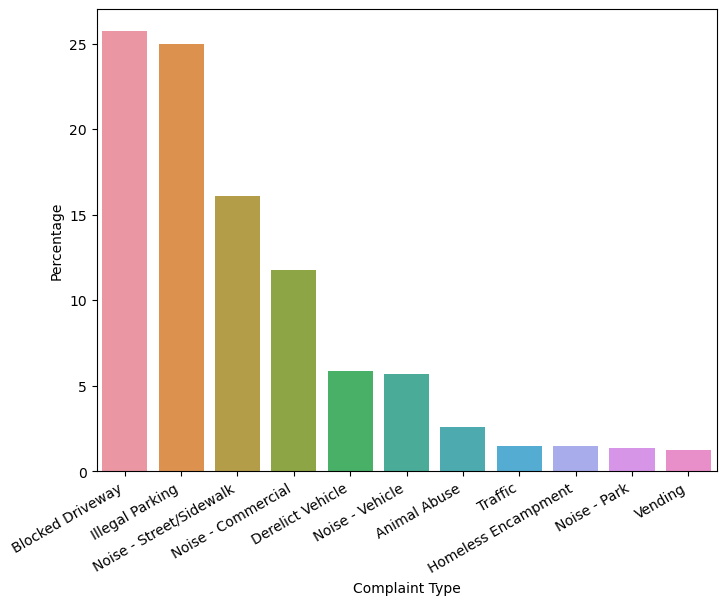

In [82]:
plt.figure(figsize = (8,6))
plt.xticks(rotation =30, ha ='right')
sns.barplot(data = complaints, x = complaints['Complaint Type'], y = complaints['Percentage'])

Will plot similar graph for other features too. 

In [86]:
des_an= np.around((df_an['Descriptor'].value_counts()/df_an['Descriptor'].value_counts().sum())*100, decimals =2)

In [87]:
des_an = des_an.to_frame()
des_an = des_an.rename(columns = {'Descriptor':'percentage'})

In [88]:
des_an = des_an.reset_index()
des_an = des_an.rename(columns ={'index':'descriptor'})

In [89]:
des_an

descriptor  percentage
0                 Loud Music/Party       20.79
1                        No Access       19.42
2    Posted Parking Sign Violation        7.61
3                     Loud Talking        7.31
4                   Partial Access        6.83
5               With License Plate        6.01
6                  Blocked Hydrant        5.43
7     Commercial Overnight Parking        4.09
8                  Car/Truck Music        3.84
9                 Blocked Sidewalk        3.76
10  Double Parked Blocking Traffic        1.93
11  Double Parked Blocking Vehicle        1.44
12                   Engine Idling        1.43
13                Banging/Pounding        1.40
14                       Neglected        1.29
15                  Car/Truck Horn        1.19
16             Congestion/Gridlock        0.94
17              In Prohibited Area        0.69
18       Other (complaint details)        0.67
19                      Unlicensed        0.61
20    Overnight Commercial Storage        0.60
21        Unauthorized Bus Layover        0.46
22           Truck Route Violation        0.35
23                       In Public        0.32
24                        Tortured        0.29
25                         Vehicle        0.20
26                         Chained        0.18
27                Detached Trailer        0.16
28                      No Shelter        0.13
29     Chronic Stoplight Violation        0.10
30         Underage - Licensed Est        0.09
31                Chronic Speeding        0.09
32                          In Car        0.09
33     Playing in Unsuitable Place        0.08
34                     Drag Racing        0.06
35                 Loud Television        0.03
36         Police Report Requested        0.03
37      After Hours - Licensed Est        0.03
38                        Building        0.02
39                 Nuisance/Truant        0.01
40     Police Report Not Requested        0.01
41       Language Access Complaint        0.00
42                    Animal Waste        0.00

In [90]:
des_an = des_an[des_an['percentage']>1]

In [91]:
des_city= np.around((df_an['City'].value_counts()/df_an['City'].value_counts().sum())*100, decimals =2)
des_city = des_city.to_frame()
des_city = des_city.rename(columns = {'City':'percentage'})
des_city = des_city[des_city['percentage']>1]
des_city = des_city.reset_index()
des_city = des_city.rename(columns ={'index':'City'})

In [92]:
des_city

City  percentage
0       BROOKLYN       32.98
1       NEW YORK       22.14
2          BRONX       13.66
3  STATEN ISLAND        4.14
4        JAMAICA        2.45
5        ASTORIA        2.12
6       FLUSHING        2.00
7      RIDGEWOOD        1.73
8         CORONA        1.44
9       WOODSIDE        1.19

In [93]:
des_add= np.around((df_an['Address Type'].value_counts()/df_an['Address Type'].value_counts().sum())*100, decimals =2)
des_add = des_add.to_frame()
des_add = des_add.rename(columns = {'Address Type':'Percentage'})
des_add = des_add[des_add['Percentage']>1]
des_add = des_add.reset_index()
des_add = des_add.rename(columns ={'index':'Address Type'})

In [94]:
des_add

Address Type  Percentage
0       ADDRESS       80.12
1  INTERSECTION       14.56
2     BLOCKFACE        4.03
3       LATLONG        1.17

In [95]:
des_loc= np.around((df_an['Location Type'].value_counts()/df_an['Location Type'].value_counts().sum())*100, decimals =2)
des_loc = des_loc.to_frame()
des_loc = des_loc.rename(columns = {'Location Type':'Percentage'})
des_loc = des_loc[des_loc['Percentage']>1]
des_loc = des_loc.reset_index()
des_loc = des_loc.rename(columns ={'index':'Location Type'})

In [96]:
des_loc

Location Type  Percentage
0             Street/Sidewalk       82.94
1            Store/Commercial        6.76
2         Club/Bar/Restaurant        5.77
3  Residential Building/House        2.33
4             Park/Playground        1.59

In [97]:
des_loc

Location Type  Percentage
0             Street/Sidewalk       82.94
1            Store/Commercial        6.76
2         Club/Bar/Restaurant        5.77
3  Residential Building/House        2.33
4             Park/Playground        1.59

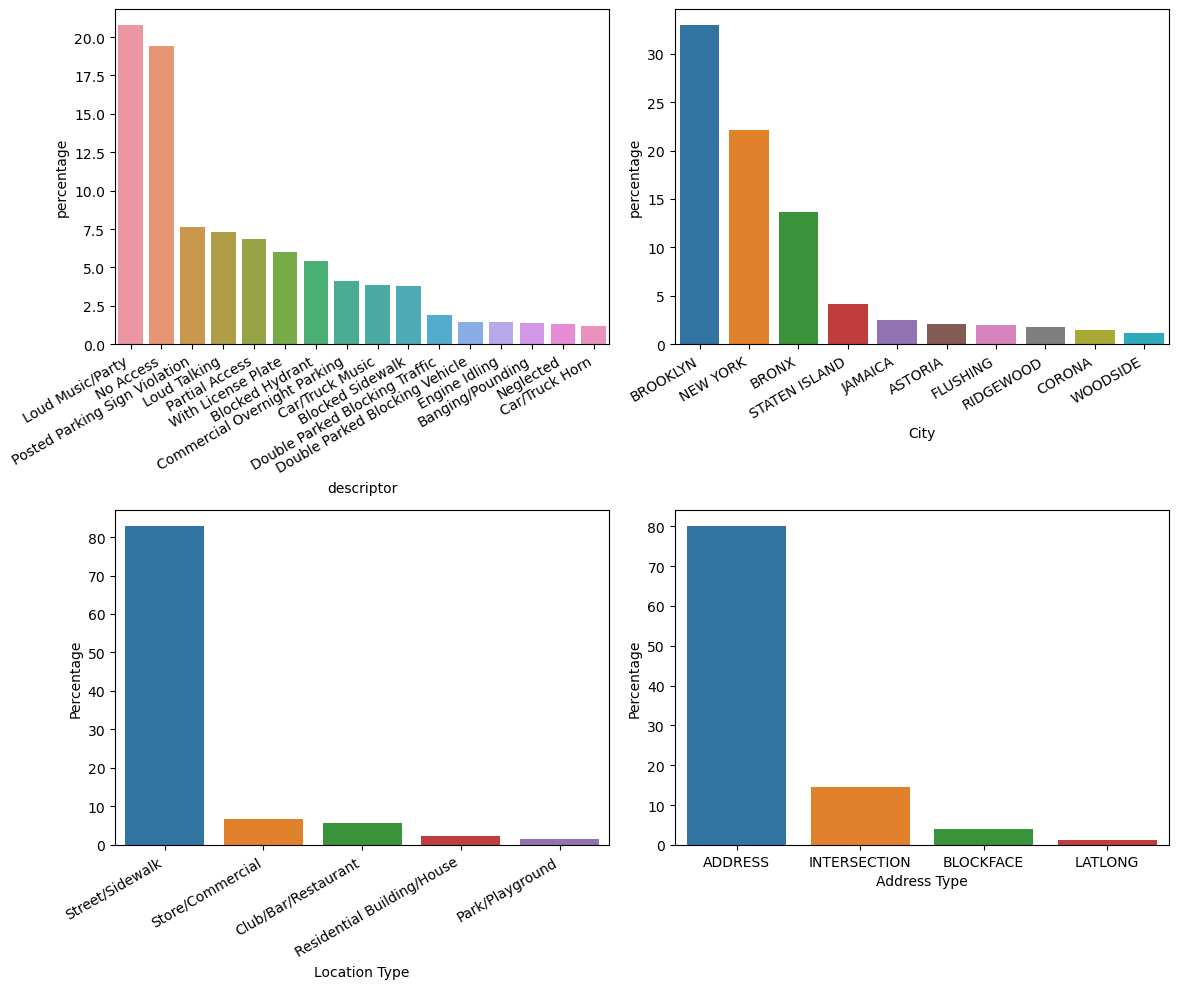

In [98]:
fig, ax = plt.subplots(2,2,figsize =(12,10))

descriptor = sns.barplot(ax = ax[0,0],data = des_an, x = des_an['descriptor'], y = des_an['percentage'])
descriptor.set_xticklabels(descriptor.get_xticklabels(), rotation=30, ha="right")

city  = sns.barplot(ax = ax[0,1],data = des_city, x = des_city['City'], y = des_city['percentage'])
city.set_xticklabels(city.get_xticklabels(), rotation=30, ha="right")

location = sns.barplot(ax = ax[1,0],data = des_loc, x = des_loc['Location Type'], y =des_loc['Percentage'])
location.set_xticklabels(location.get_xticklabels(), rotation=30, ha="right")

add = sns.barplot(ax= ax[1,1], data = des_add, x = des_add['Address Type'], y =des_add['Percentage'])
location.set_xticklabels(location.get_xticklabels(), rotation=30, ha="right")

plt.tight_layout()

In [100]:
time_diff = df_an['time diff'].describe()
time_diff

count                       298534
mean     0 days 04:18:51.832782865
std      0 days 06:05:22.141833856
min                0 days 00:01:00
25%                0 days 01:16:33
50%         0 days 02:42:55.500000
75%                0 days 05:21:00
max               24 days 16:52:22
Name: time diff, dtype: object

In [101]:
print('Average time taken to solve a case : ', time_diff[1])
print('\n')
print('Central value of distribution : ', time_diff[5])
print('\n')
print('Minimum time taken to solve any case : ', time_diff[3])
print('\n')
print('Maximum time taken to solve any case : ', time_diff[7])
print('\n')
print('Standard Deviatioin : ', time_diff[2])
print('\n')
print('Most occured Value : ', df_an['time diff'].mode())

Average time taken to solve a case :  0 days 04:18:51.832782865


Central value of distribution :  0 days 02:42:55.500000


Minimum time taken to solve any case :  0 days 00:01:00


Maximum time taken to solve any case :  24 days 16:52:22


Standard Deviatioin :  0 days 06:05:22.141833856


Most occured Value :  0   0 days 00:36:00
Name: time diff, dtype: timedelta64[ns]


In [102]:
time_diff_hr = df_an['time diff in hr'].describe()
time_diff_hr

count    298534.000000
mean          4.314399
std           6.089487
min           0.020000
25%           1.280000
50%           2.720000
75%           5.350000
max         592.870000
Name: time diff in hr, dtype: float64

In [103]:
print('Average time taken to solve a case : ', time_diff_hr[1])
print('\n')
print('Central value of distribution : ', time_diff_hr[5])
print('\n')
print('Minimum time taken to solve any case : ', time_diff_hr[3])
print('\n')
print('Maximum time taken to solve any case : ', time_diff_hr[7])
print('\n')
print('Standard Deviatioin : ', time_diff_hr[2])
print('\n')
print('Most occured Value : ', df_an['time diff in hr'].mode())

Average time taken to solve a case :  4.314398996429218


Central value of distribution :  2.72


Minimum time taken to solve any case :  0.02


Maximum time taken to solve any case :  592.87


Standard Deviatioin :  6.089487171662688


Most occured Value :  0    0.88
Name: time diff in hr, dtype: float64


Assigning categories to cases on the basis of time to better analyse the resolution time

In [104]:
conditions = [df_an['time diff in hr'] <= 0.5, 
             (0.50 < df_an['time diff in hr']) & (df_an['time diff in hr'] <= 1.00),
             (1.00 < df_an['time diff in hr']) & (df_an['time diff in hr'] <= 2.00),
             (2.00 < df_an['time diff in hr']) & (df_an['time diff in hr'] <= 6.00),
             (6.00 < df_an['time diff in hr']) & (df_an['time diff in hr'] <= 10.00),
             (10.00 < df_an['time diff in hr'])]

choices = ['Super fast','Very fast','Fast','Normal','Slow','Super Slow']

df_an['Solution Status'] = np.select(conditions,choices)

In [105]:
df_an.head()

Created Date         Closed Date           Complaint Type  \
0 2015-12-31 23:59:45 2016-01-01 00:55:00  Noise - Street/Sidewalk   
1 2015-12-31 23:59:44 2016-01-01 01:26:00         Blocked Driveway   
2 2015-12-31 23:59:29 2016-01-01 04:51:00         Blocked Driveway   
3 2015-12-31 23:57:46 2016-01-01 07:43:00          Illegal Parking   
4 2015-12-31 23:56:58 2016-01-01 03:24:00          Illegal Parking   

                     Descriptor    Location Type  Incident Zip Address Type  \
0              Loud Music/Party  Street/Sidewalk       10034.0      ADDRESS   
1                     No Access  Street/Sidewalk       11105.0      ADDRESS   
2                     No Access  Street/Sidewalk       10458.0      ADDRESS   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0      ADDRESS   
4              Blocked Sidewalk  Street/Sidewalk       11373.0      ADDRESS   

       City  Status       Due Date Resolution Action Updated Date    Borough  \
0  NEW YORK  Closed  01-01-16 7:59                  01-01-16 0:55  MANHATTAN   
1   ASTORIA  Closed  01-01-16 7:59                  01-01-16 1:26     QUEENS   
2     BRONX  Closed  01-01-16 7:59                  01-01-16 4:51      BRONX   
3     BRONX  Closed  01-01-16 7:57                  01-01-16 7:43      BRONX   
4  ELMHURST  Closed  01-01-16 7:56                  01-01-16 3:24     QUEENS   

    Latitude  Longitude       time diff  time diff in sec  time diff in hr  \
0  40.865682 -73.923501 0 days 00:55:15            3315.0             0.92   
1  40.775945 -73.915094 0 days 01:26:16            5176.0             1.44   
2  40.870325 -73.888525 0 days 04:51:31           17491.0             4.86   
3  40.835994 -73.828379 0 days 07:45:14           27914.0             7.75   
4  40.733060 -73.874170 0 days 03:27:02           12422.0             3.45   

  Solution Status  
0       Very fast  
1            Fast  
2          Normal  
3            Slow  
4          Normal

<Axes: >

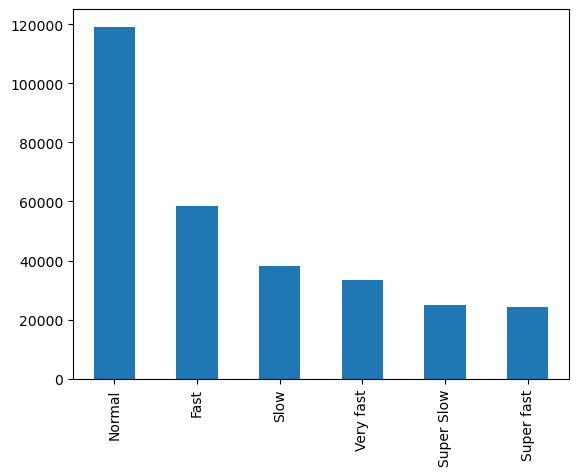

In [106]:
df_an['Solution Status'].value_counts().plot(kind ='bar')

will do feature engineering on created date to check data distribution according to days, month and year

In [108]:
df_an['Day_no'] = pd.DatetimeIndex(df_an['Created Date']).day
df_an['Month_no'] = pd.DatetimeIndex(df_an['Created Date']).month
df_an['Year'] = pd.DatetimeIndex(df_an['Created Date']).year

In [109]:
import calendar
df_an['Month'] = df_an['Month_no'].apply(lambda x: calendar.month_abbr[x])

In [110]:
import datetime as dt
df_an['Day'] = df_an[['Created Date']].apply(lambda x: dt.datetime.strftime(x['Created Date'], '%A'), axis=1)

In [111]:
df_an.head()

Created Date         Closed Date           Complaint Type  \
0 2015-12-31 23:59:45 2016-01-01 00:55:00  Noise - Street/Sidewalk   
1 2015-12-31 23:59:44 2016-01-01 01:26:00         Blocked Driveway   
2 2015-12-31 23:59:29 2016-01-01 04:51:00         Blocked Driveway   
3 2015-12-31 23:57:46 2016-01-01 07:43:00          Illegal Parking   
4 2015-12-31 23:56:58 2016-01-01 03:24:00          Illegal Parking   

                     Descriptor    Location Type  Incident Zip Address Type  \
0              Loud Music/Party  Street/Sidewalk       10034.0      ADDRESS   
1                     No Access  Street/Sidewalk       11105.0      ADDRESS   
2                     No Access  Street/Sidewalk       10458.0      ADDRESS   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0      ADDRESS   
4              Blocked Sidewalk  Street/Sidewalk       11373.0      ADDRESS   

       City  Status       Due Date  ...  Longitude       time diff  \
0  NEW YORK  Closed  01-01-16 7:59  ... -73.923501 0 days 00:55:15   
1   ASTORIA  Closed  01-01-16 7:59  ... -73.915094 0 days 01:26:16   
2     BRONX  Closed  01-01-16 7:59  ... -73.888525 0 days 04:51:31   
3     BRONX  Closed  01-01-16 7:57  ... -73.828379 0 days 07:45:14   
4  ELMHURST  Closed  01-01-16 7:56  ... -73.874170 0 days 03:27:02   

   time diff in sec  time diff in hr Solution Status  Day_no  Month_no  Year  \
0            3315.0             0.92       Very fast      31        12  2015   
1            5176.0             1.44            Fast      31        12  2015   
2           17491.0             4.86          Normal      31        12  2015   
3           27914.0             7.75            Slow      31        12  2015   
4           12422.0             3.45          Normal      31        12  2015   

   Month       Day  
0    Dec  Thursday  
1    Dec  Thursday  
2    Dec  Thursday  
3    Dec  Thursday  
4    Dec  Thursday  

[5 rows x 23 columns]

<Axes: xlabel='Day', ylabel='count'>

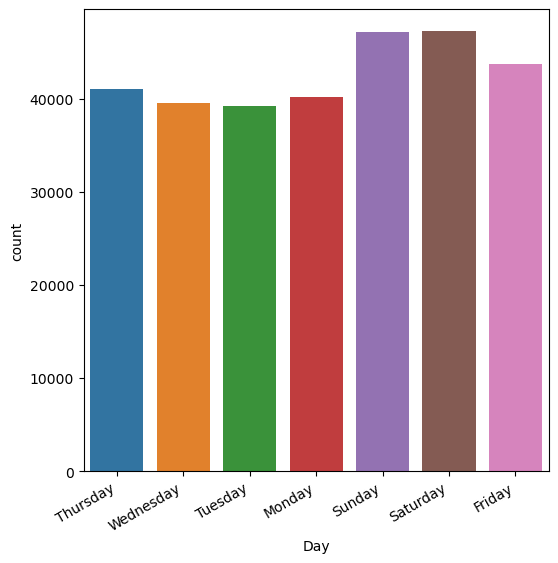

In [112]:
plt.figure(figsize=(6,6))
plt.xticks(rotation = 30, ha = 'right')
sns.countplot(data = df_an, x= 'Day')

<Axes: xlabel='Month', ylabel='count'>

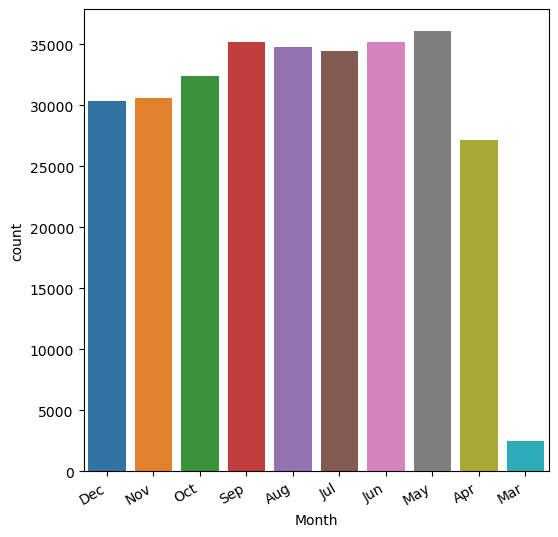

In [113]:
plt.figure(figsize=(6,6))
plt.xticks(rotation = 30, ha = 'right')
sns.countplot(data = df_an, x= 'Month')

<Axes: xlabel='Year', ylabel='count'>

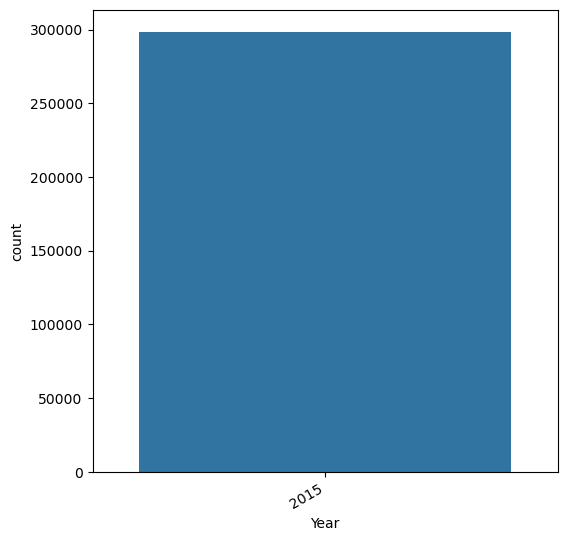

In [114]:
plt.figure(figsize=(6,6))
plt.xticks(rotation = 30, ha = 'right')
sns.countplot(data = df_an, x= 'Year')

Grouping data according to Borough and day to see correlation

<Axes: xlabel='Borough,Day'>

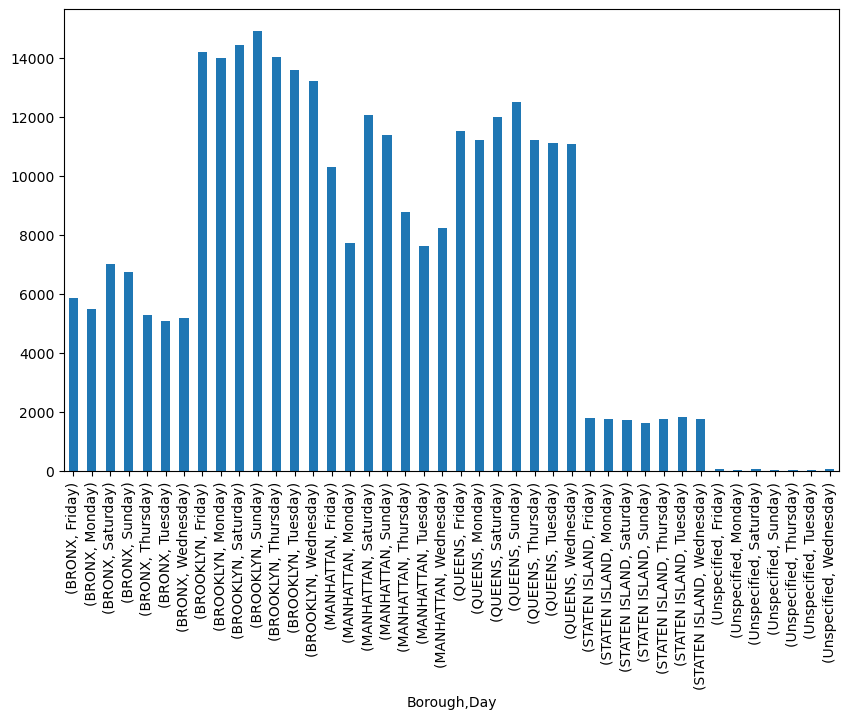

In [116]:
comp_day = df_an.groupby(['Borough', 'Day'])['Day_no'].count()
comp_day.plot(kind = 'bar', figsize = (10,6))

<Axes: xlabel='Borough', ylabel='count'>

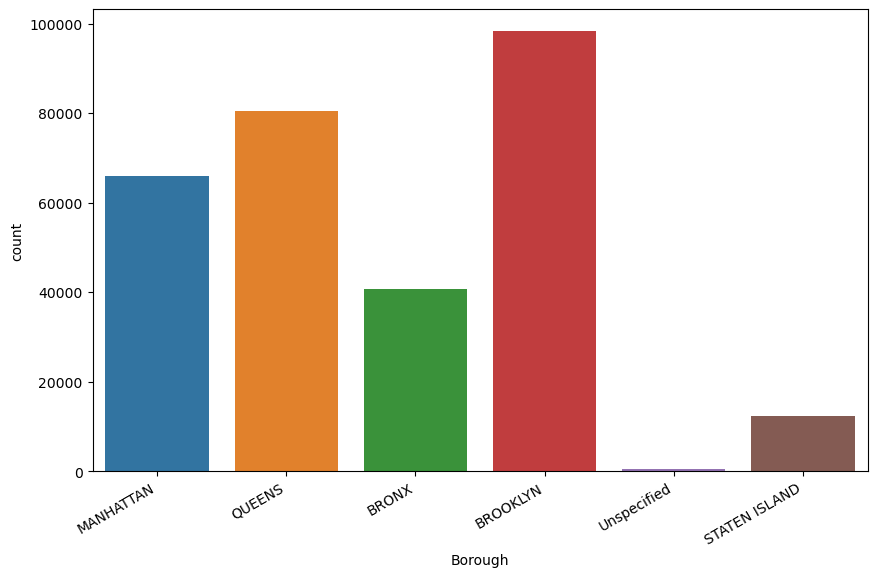

In [124]:
plt.figure(figsize = (10,6))
plt.xticks(rotation = 30, ha='right')
sns.countplot(data = df_an, x='Borough')

Most complaints are from 'Brooklyn' lets analyse brooklyn's data more using latitude and longitude

<Axes: xlabel='Descriptor', ylabel='count'>

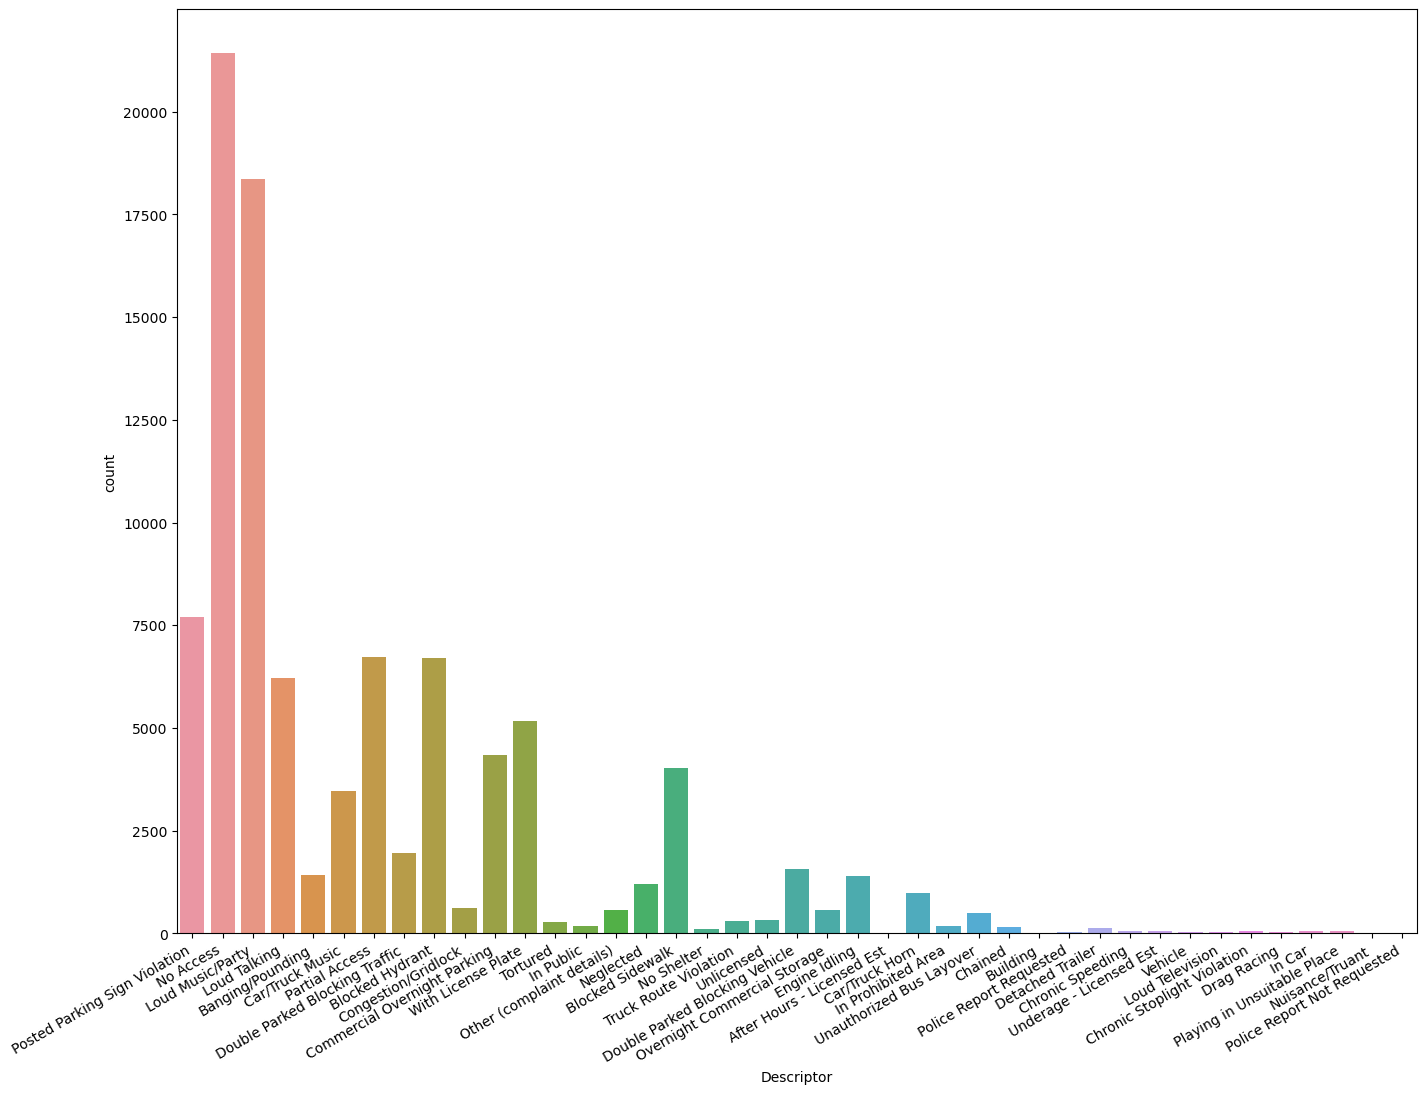

In [133]:
plt.figure(figsize =(16,12))
plt.xticks(rotation = 30, ha ='right')
sns.countplot(data= df_an[df_an['City'] == 'BROOKLYN'], x = 'Descriptor')

<Axes: xlabel='Location Type', ylabel='count'>

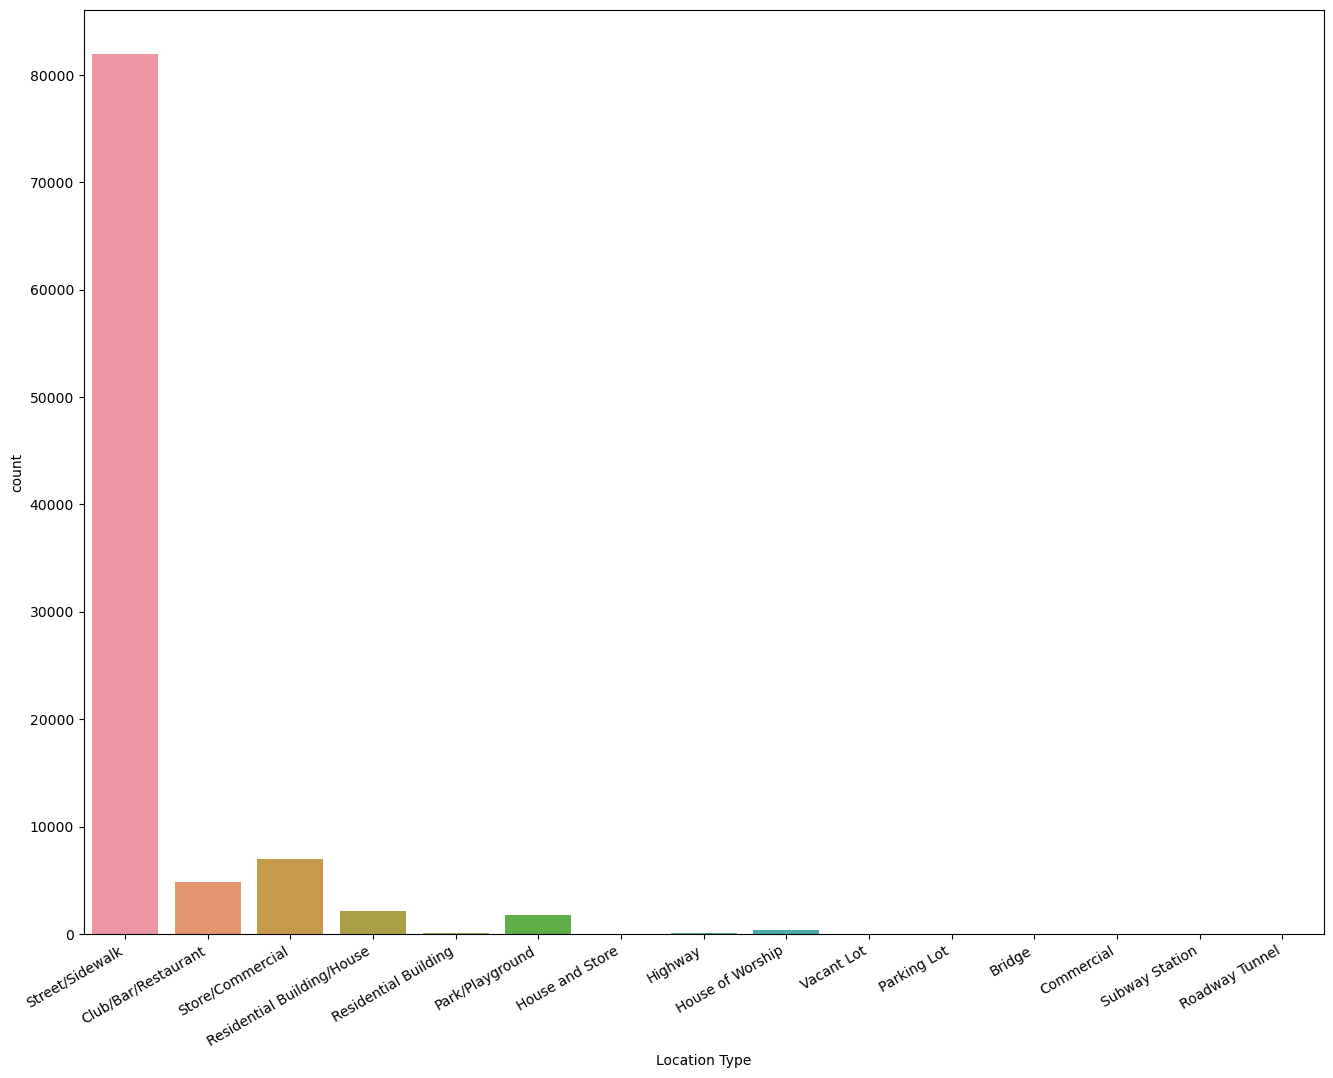

In [135]:
plt.figure(figsize =(16,12))
plt.xticks(rotation = 30, ha ='right')
sns.countplot(data= df_an[df_an['City'] == 'BROOKLYN'], x = 'Location Type')

Will plot descriptor and lcation type in scatter plot with using latitude and longitude to understand how this data is distributed around brooklyn

<Axes: xlabel='Latitude', ylabel='Longitude'>

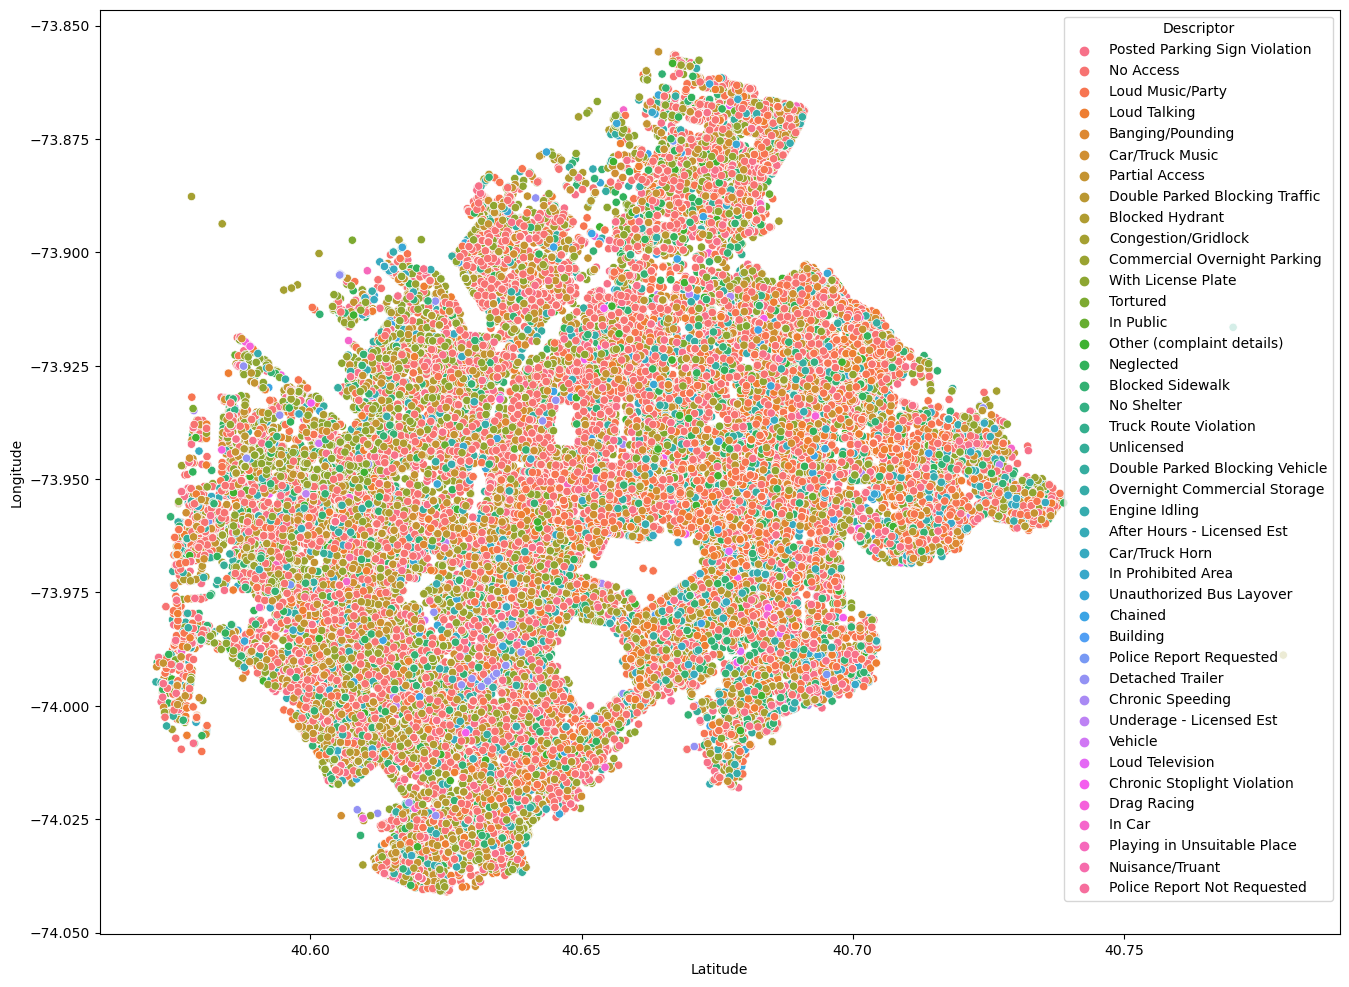

In [126]:
plt.figure(figsize =(16,12))
sns.scatterplot(data= df_an[df_an['City'] == 'BROOKLYN'], x = 'Latitude', y = 'Longitude', hue= 'Descriptor')

<Axes: xlabel='Latitude', ylabel='Longitude'>

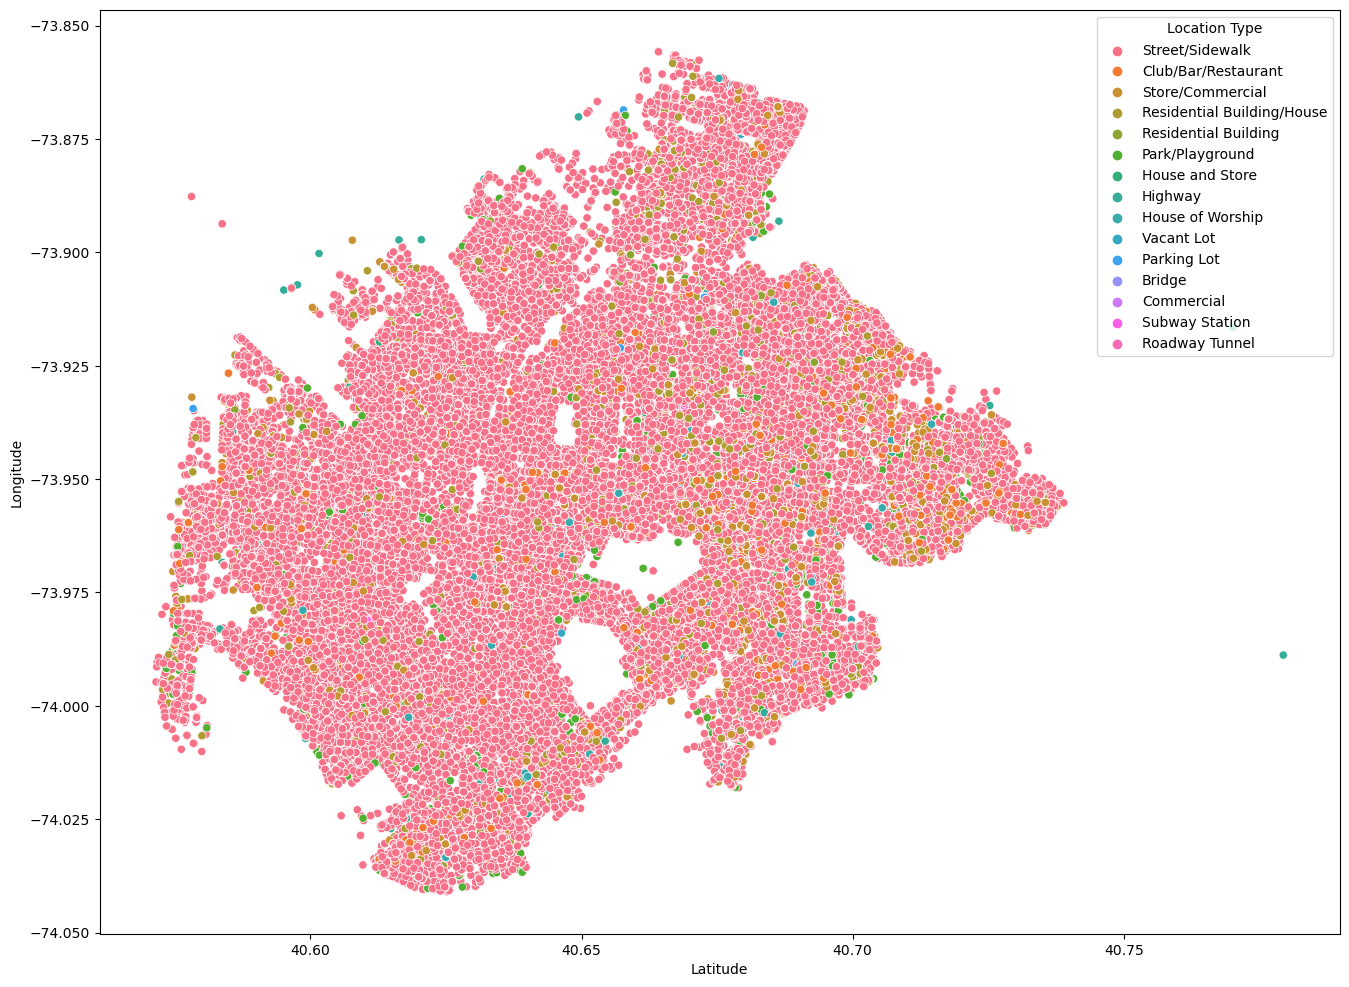

In [128]:
plt.figure(figsize =(16,12))
sns.scatterplot(data= df_an[df_an['City'] == 'BROOKLYN'], x = 'Latitude', y = 'Longitude', hue= 'Location Type')

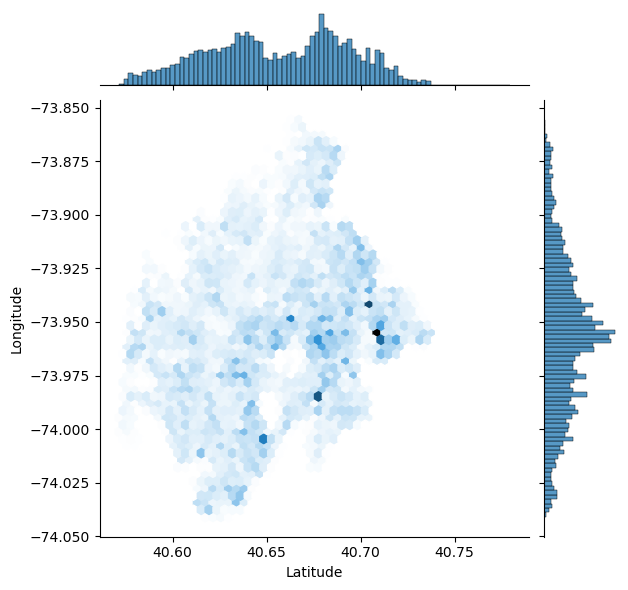

In [130]:
sns.jointplot(data= df_an[df_an['City'] == 'BROOKLYN'], x = 'Latitude', y = 'Longitude', kind = 'hex')

<Axes: xlabel='Borough', ylabel='count'>

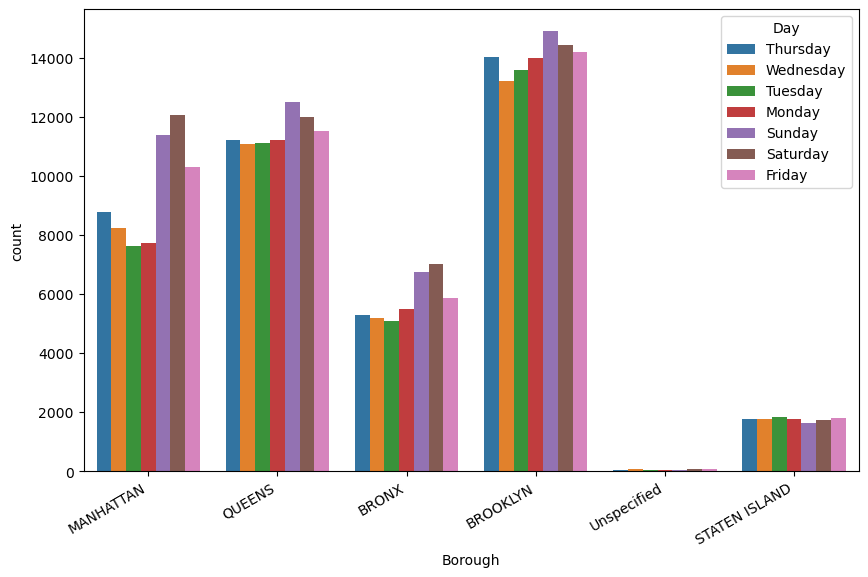

In [118]:
plt.figure(figsize = (10,6))
plt.xticks(rotation = 30, ha='right')
sns.countplot(data = df_an, x='Borough', hue = 'Day')

<Axes: xlabel='Borough', ylabel='count'>

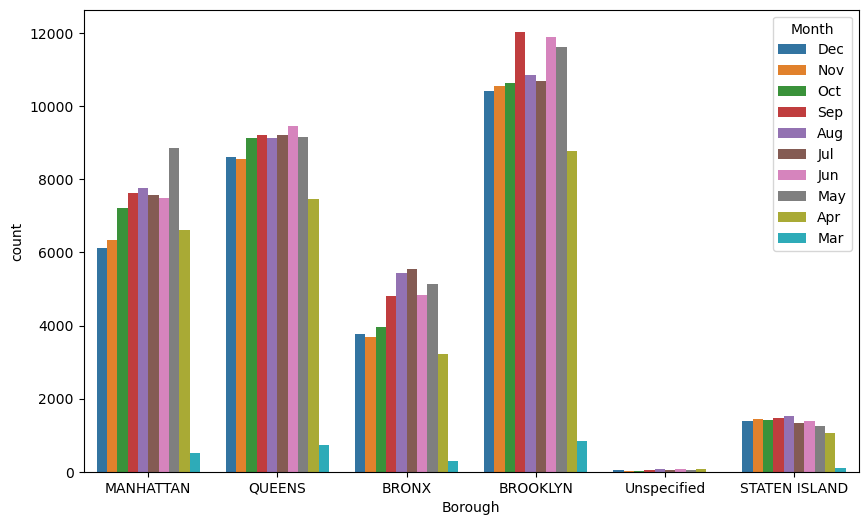

In [123]:
plt.figure(figsize = (10,6))
sns.countplot(data = df_an, x='Borough', hue = 'Month')

checking how complaint types are distributed among different boroughs

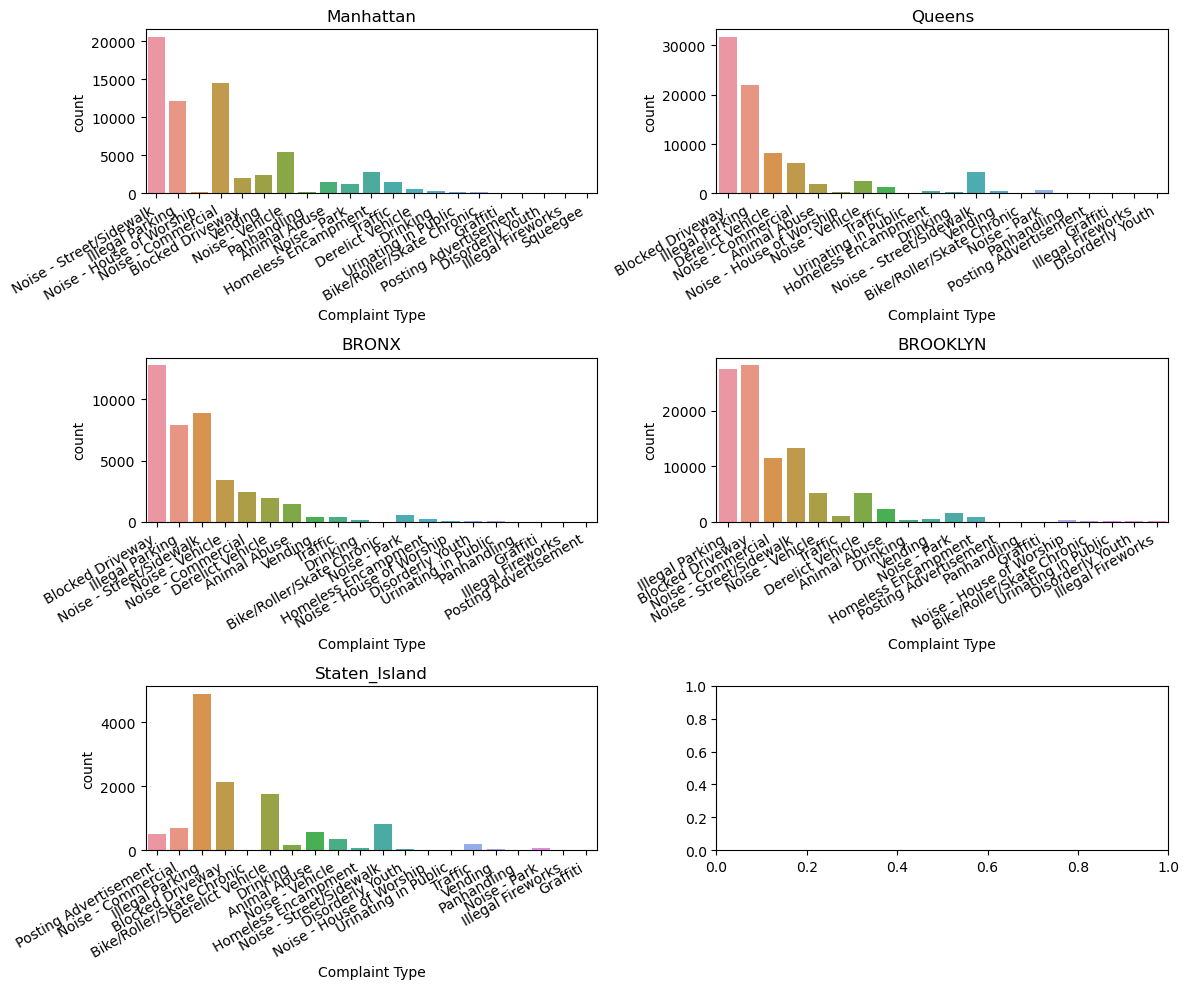

In [121]:
fig, ax = plt.subplots(3,2,figsize =(12,10))

Manhattan = sns.countplot(ax = ax[0,0],data = df_an[df_an['Borough'] == 'MANHATTAN'], x ='Complaint Type')
Manhattan.set_xticklabels(Manhattan.get_xticklabels(), rotation=30, ha="right")
Manhattan.set_title('Manhattan')

Queens = sns.countplot(ax = ax[0,1],data = df_an[df_an['Borough'] == 'QUEENS'], x ='Complaint Type')
Queens.set_xticklabels(Queens.get_xticklabels(), rotation=30, ha="right")
Queens.set_title('Queens')

BRONX = sns.countplot(ax = ax[1,0],data = df_an[df_an['Borough'] == 'BRONX'], x ='Complaint Type')
BRONX.set_xticklabels(BRONX.get_xticklabels(), rotation=30, ha="right")
BRONX.set_title('BRONX')

BROOKLYN = sns.countplot(ax = ax[1,1],data = df_an[df_an['Borough'] == 'BROOKLYN'], x ='Complaint Type')
BROOKLYN.set_xticklabels(BROOKLYN.get_xticklabels(), rotation=30, ha="right")
BROOKLYN.set_title('BROOKLYN')

Staten_Island = sns.countplot(ax = ax[2,0],data = df_an[df_an['Borough'] == 'STATEN ISLAND'], x ='Complaint Type')
Staten_Island.set_xticklabels(Staten_Island.get_xticklabels(), rotation=30, ha="right")
Staten_Island.set_title('Staten_Island')

plt.tight_layout()

In [158]:
complaint_time = df_an.groupby(['Complaint Type'])['time diff in hr'].mean().sort_values()
complaint_time = complaint_time.to_frame()
complaint_time = complaint_time.rename(columns ={'time diff in hr':'Mean'})
complaint_time = complaint_time.reset_index()
complaint_time = complaint_time.rename(columns = {'index':'Complaint Type'})
complaint_time.head()

Complaint Type      Mean
0     Posting Advertisement  1.975926
1         Illegal Fireworks  2.761190
2        Noise - Commercial  3.147167
3  Noise - House of Worship  3.193240
4              Noise - Park  3.410728

In [159]:
complaint_time

Complaint Type        Mean
0       Posting Advertisement    1.975926
1           Illegal Fireworks    2.761190
2          Noise - Commercial    3.147167
3    Noise - House of Worship    3.193240
4                Noise - Park    3.410728
5     Noise - Street/Sidewalk    3.445221
6                     Traffic    3.448639
7            Disorderly Youth    3.558916
8             Noise - Vehicle    3.588976
9         Urinating in Public    3.626486
10  Bike/Roller/Skate Chronic    3.766533
11                   Drinking    3.861827
12                    Vending    4.013910
13                   Squeegee    4.047500
14        Homeless Encampment    4.365614
15                Panhandling    4.372852
16            Illegal Parking    4.501153
17           Blocked Driveway    4.740904
18               Animal Abuse    5.213239
19              Agency Issues    5.258333
20                   Graffiti    7.151062
21           Derelict Vehicle    7.364159
22           Animal in a Park  336.830000

<Axes: xlabel='Complaint Type', ylabel='time diff in hr'>

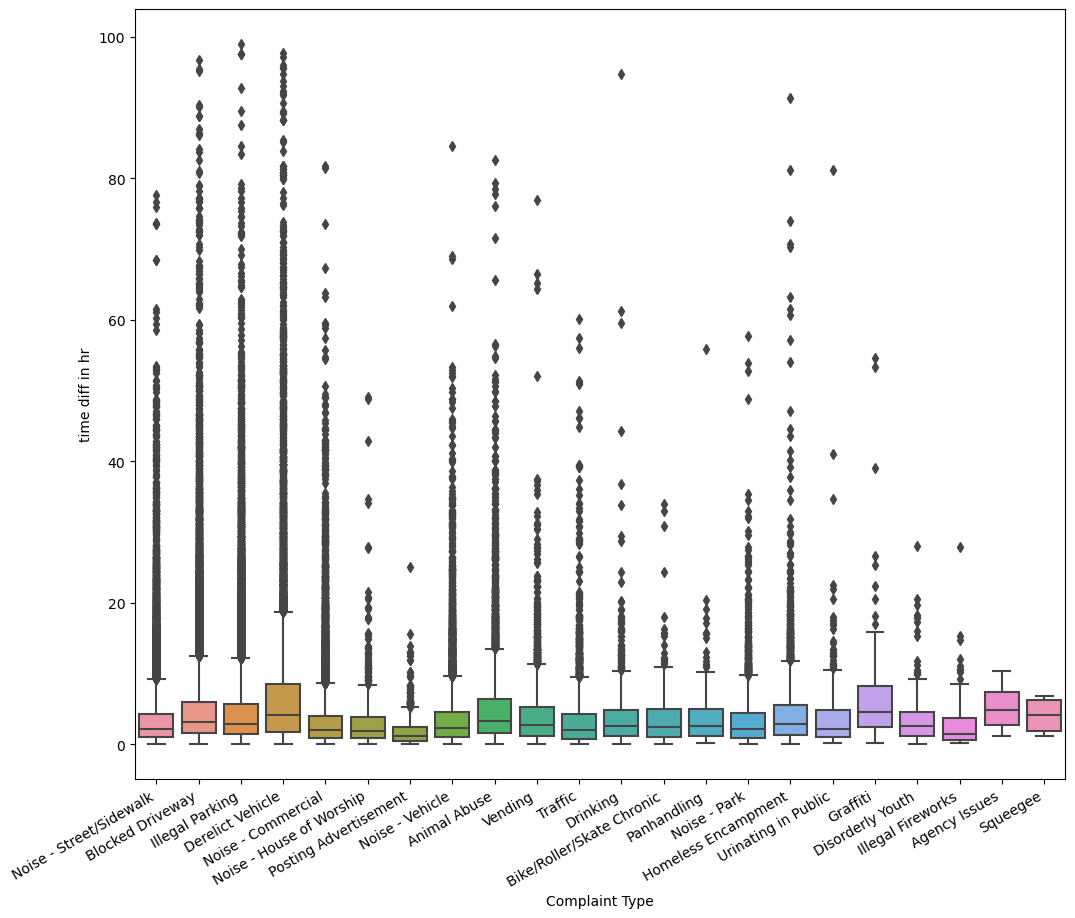

In [140]:
plt.figure(figsize=(12,10))
plt.xticks(rotation =30, ha = 'right')
sns.boxplot(data = df_an[df_an['time diff in hr']<100], x ='Complaint Type', y = 'time diff in hr')

will perform some statistical tests to check 

Whether the average response time across complaint types is similar or not (overall)?

Are the type of complaint or service requested and location related?

In [141]:
df_comp_loc = pd.DataFrame(df_an[['Complaint Type','Location Type','time diff in hr']])

In [142]:
df_comp_loc = df_comp_loc.rename(columns = {'Complaint Type':'Complaint_Type','Location Type':'Location_type',
                                            'time diff in hr':'time_diff_in_hr'})

In [145]:
df_comp_loc.dropna(inplace = True)

In [146]:
df_comp_loc.isna().sum()

Complaint_Type     0
Location_type      0
time_diff_in_hr    0
dtype: int64

In [147]:
df_comp_loc.head()

Complaint_Type    Location_type  time_diff_in_hr
0  Noise - Street/Sidewalk  Street/Sidewalk             0.92
1         Blocked Driveway  Street/Sidewalk             1.44
2         Blocked Driveway  Street/Sidewalk             4.86
3          Illegal Parking  Street/Sidewalk             7.75
4          Illegal Parking  Street/Sidewalk             3.45

Statistical Testing

Assigning numbers to complaint and location type

In [148]:
def assign_num(x,val):
    if x in val:
        return val.index(x) 

In [152]:
comp_names = list(df_comp_loc['Complaint_Type'].unique())
comp_names

['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Illegal Parking',
 'Derelict Vehicle',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Noise - Vehicle',
 'Animal Abuse',
 'Vending',
 'Traffic',
 'Drinking',
 'Bike/Roller/Skate Chronic',
 'Panhandling',
 'Noise - Park',
 'Homeless Encampment',
 'Urinating in Public',
 'Graffiti',
 'Disorderly Youth',
 'Illegal Fireworks',
 'Squeegee',
 'Animal in a Park']

In [153]:
assign_num('Illegal Parking',comp_names) #function is working 

2

In [154]:
loc_names = list(df_comp_loc['Location_type'].unique())

In [155]:
df_comp_loc['compaint_ty_num'] = df_comp_loc['Complaint_Type'].apply(lambda x:assign_num(x,comp_names))
df_comp_loc['location_ty_num'] = df_comp_loc['Location_type'].apply(lambda x:assign_num(x,loc_names))

In [156]:
df_comp_loc.head()

Complaint_Type    Location_type  time_diff_in_hr  compaint_ty_num  \
0  Noise - Street/Sidewalk  Street/Sidewalk             0.92                0   
1         Blocked Driveway  Street/Sidewalk             1.44                1   
2         Blocked Driveway  Street/Sidewalk             4.86                1   
3          Illegal Parking  Street/Sidewalk             7.75                2   
4          Illegal Parking  Street/Sidewalk             3.45                2   

   location_ty_num  
0                0  
1                0  
2                0  
3                0  
4                0

In [157]:
df_comp_loc = df_comp_loc.rename(columns = {'compaint_ty_num':'complaint_ty_num'})

We saw mean time of 'Animal in a park' is max, way too high then any other complaint type. 

But there is only one data point for this complaint type so we will perform anova with and without it to see difference

# One Way  ANOVA

In [164]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

H0 = The average response time across complaint types is similar

H1 = The average response time across complaint types is not similar 

In [165]:
anova_comp = ols('time_diff_in_hr ~ complaint_ty_num', data = df_comp_loc).fit()
comp_an = sm.stats.anova_lm(anova_comp,typ=2) 

In [167]:
comp_an

sum_sq        df          F        PR(>F)
complaint_ty_num  2.954529e+03       1.0  79.683148  4.419362e-19
Residual          1.106436e+07  298404.0        NaN           NaN

Since our p value<0.05 we can reject our null hypothesis i.e. there is statistical similarity in the means of 
request closing time of all complaint type and accept alternate hypothesis i.e. there is significant statistical difference 
in means of request closing time of different complaint types

In [168]:
anova_loc = ols('time_diff_in_hr ~ location_ty_num', data = df_comp_loc).fit()
loc_an = sm.stats.anova_lm(anova_loc,typ=2) 

In [169]:
loc_an

sum_sq        df           F        PR(>F)
location_ty_num  8.266834e+03       1.0  223.062241  2.026320e-50
Residual         1.105905e+07  298404.0         NaN           NaN

H0 = The average response time across Location types is similar

H1 = The average response time across Location types is not similar 

Since our p value<0.05 we can reject our null hypothesis i.e. there is statistical similarity in the means of 
request closing time of all Location type and accept alternate hypothesis i.e. there is significant statistical difference 
in means of request closing time of different Location types

# Two Way ANOVA

H0: Type of complaint or service requested and location type have no bearing on response closing time.
    
H1: Type of complaint or service requested and/or location type do affect response closing time.

In [171]:
anova_comp_loc = ols('time_diff_in_hr ~ complaint_ty_num+location_ty_num', data = df_comp_loc).fit()
comp_loc_an = sm.stats.anova_lm(anova_comp_loc,typ=2) 

In [172]:
comp_loc_an

sum_sq        df           F        PR(>F)
complaint_ty_num  1.565466e+01       1.0    0.422406  5.157397e-01
location_ty_num   5.327960e+03       1.0  143.762945  4.074191e-33
Residual          1.105903e+07  298403.0         NaN           NaN

p value > 0.05 for complaint type so we can not reject that complaint type do not have effect on request closing time.

Whereas p value< 0.05 for location type so we can reject null hypothesis that location type do not have effect on request 
closing time.

Both having effect on closing time is not clear as of now. 

In [173]:
anova_comp_loc_int = ols('time_diff_in_hr ~ complaint_ty_num+location_ty_num+complaint_ty_num*location_ty_num', data = df_comp_loc).fit()
comp_loc_int = sm.stats.anova_lm(anova_comp_loc_int,typ=2) 

In [174]:
comp_loc_int

sum_sq        df           F  \
complaint_ty_num                  1.565466e+01       1.0    0.422849   
location_ty_num                   5.327960e+03       1.0  143.913816   
complaint_ty_num:location_ty_num  1.163068e+04       1.0  314.156841   
Residual                          1.104740e+07  298402.0         NaN   

                                        PR(>F)  
complaint_ty_num                  5.155194e-01  
location_ty_num                   3.776342e-33  
complaint_ty_num:location_ty_num  2.949966e-70  
Residual                                   NaN

p value > 0.05 for complaint type so we can not reject that complaint type do not have effect on request closing time.

Whereas p value< 0.05 for location type so we can reject null hypothesis that location type do not have effect on request closing time.

Now we can say that we cannot reject or null hypothesis completly. 

Now doing same test without values with very low data points

In [176]:
df_comp_loc['Complaint_Type'].value_counts()

Blocked Driveway             76773
Illegal Parking              74497
Noise - Street/Sidewalk      48067
Noise - Commercial           35242
Derelict Vehicle             17580
Noise - Vehicle              17030
Animal Abuse                  7765
Traffic                       4491
Homeless Encampment           4407
Noise - Park                  4021
Vending                       3793
Drinking                      1274
Noise - House of Worship       927
Posting Advertisement          647
Urinating in Public            591
Bike/Roller/Skate Chronic      424
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Squeegee                         4
Animal in a Park                 1
Name: Complaint_Type, dtype: int64

In [178]:
df_comp_loc['Location_type'].value_counts()

Street/Sidewalk               247503
Store/Commercial               20183
Club/Bar/Restaurant            17227
Residential Building/House      6953
Park/Playground                 4751
House of Worship                 927
Residential Building             227
Highway                          214
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Park                               1
Name: Location_type, dtype: int64

In [179]:
comp_indexes= df_comp_loc[(df_comp_loc['Complaint_Type']=='Squeegee') |(df_comp_loc['Complaint_Type']=='Animal in a Park')].index

In [180]:
df_comp_loc.drop(comp_indexes, inplace = True)

In [181]:
df_comp_loc['Location_type'].value_counts()

Street/Sidewalk               247499
Store/Commercial               20183
Club/Bar/Restaurant            17227
Residential Building/House      6953
Park/Playground                 4751
House of Worship                 927
Residential Building             227
Highway                          214
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Name: Location_type, dtype: int64

In [182]:
loc_indexes= df_comp_loc[(df_comp_loc['Location_type']=='Bridge')].index

In [183]:
df_comp_loc.drop(loc_indexes, inplace = True)

In [188]:
anova_comp_1 = ols('time_diff_in_hr ~ complaint_ty_num', data = df_comp_loc).fit()
comp_an_1 = sm.stats.anova_lm(anova_comp_1,typ=2) 

In [190]:
comp_an_1

sum_sq        df        F        PR(>F)
complaint_ty_num  3.333924e+03       1.0  90.8242  1.581338e-21
Residual          1.095339e+07  298397.0      NaN           NaN

In [191]:
anova_loc_1 = ols('time_diff_in_hr ~ location_ty_num', data = df_comp_loc).fit()
loc_an_1 = sm.stats.anova_lm(anova_loc_1,typ=2) 

In [192]:
loc_an_1

sum_sq        df           F        PR(>F)
location_ty_num  9.719642e+03       1.0  264.941175  1.524803e-59
Residual         1.094700e+07  298397.0         NaN           NaN

In [193]:
anova_comp_loc_1 = ols('time_diff_in_hr ~ complaint_ty_num+location_ty_num', data = df_comp_loc).fit()
comp_loc_an_1 = sm.stats.anova_lm(anova_comp_loc_1,typ=2) 

In [194]:
comp_loc_an_1

sum_sq        df           F        PR(>F)
complaint_ty_num  8.031695e+00       1.0    0.218930  6.398568e-01
location_ty_num   6.393750e+03       1.0  174.282469  8.811965e-40
Residual          1.094700e+07  298396.0         NaN           NaN

In [195]:
anova_comp_loc_int_1 = ols('time_diff_in_hr ~ complaint_ty_num+location_ty_num+complaint_ty_num*location_ty_num', data = df_comp_loc).fit()
comp_loc_int_1 = sm.stats.anova_lm(anova_comp_loc_int_1,typ=2) 

In [196]:
comp_loc_int_1

sum_sq        df           F  \
complaint_ty_num                  8.031695e+00       1.0    0.219081   
location_ty_num                   6.393750e+03       1.0  174.402714   
complaint_ty_num:location_ty_num  7.584255e+03       1.0  206.876182   
Residual                          1.093941e+07  298395.0         NaN   

                                        PR(>F)  
complaint_ty_num                  6.397413e-01  
location_ty_num                   8.295245e-40  
complaint_ty_num:location_ty_num  6.841217e-47  
Residual                                   NaN

We again have similar results

p value > 0.05 for complaint type so we can not reject that complaint type do not have effect on request closing time.

Whereas p value< 0.05 for location type so we can reject null hypothesis that location type do not have effect on request closing time.

Now we can say that we cannot reject or null hypothesis completly. 